The Mission 
(should you choose to accept)
We'd like you to analyze the library data located here and help us 
1.	build a model to predict the likelihood of a late return of any book at checkout time? 
2.	Are there any factors you can find that are connected with late returns?  
3.	What would you recommend the library do to mitigate the risks you find? 
4.	How would you present your findings to them to get buy-in? 


In [3]:
# Importing libraries
import pandas as pd
import numpy as np

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
path = "/Data Challenge/"

In [6]:
# Downloading datasets
books = pd.read_csv(path+"books.csv")
checkouts = pd.read_csv(path+"checkouts.csv")
customers = pd.read_csv(path+"customers.csv")
libraries = pd.read_csv(path+"libraries.csv")

# Exploring the data

In [7]:
# Checking books data
books.head()

,id,title,authors,publisher,publishedDate,categories,price,pages
0,hVFwAAAAQBAJ,Ogilvy on Advertising,['David Ogilvy'],Vintage,2013-09-11,['Social Science'],72.99,320
1,bRY9AAAAYAAJ,Foreign Publications for Advertising American ...,['United States. Bureau of Foreign and Domesti...,NaN,1913,['Advertising'],469.99,654
2,ZapAAAAAIAAJ,Advertising and the Public Interest,"['John A. Howard', 'James Hulbert']",NaN,1973,['Advertising'],372.0,784
3,A-HthMfF5moC,Profitable Advertising,NaN,NaN,1894,['Advertising'],240.99USD,559
4,4Z9JAAAAMAAJ,Report of the Federal Trade Commission on Dist...,['United States. Federal Trade Commission'],NaN,1944,['Government publications'],539.0,757


In [8]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             240 non-null    object
 1   title          240 non-null    object
 2   authors        173 non-null    object
 3   publisher      94 non-null     object
 4   publishedDate  238 non-null    object
 5   categories     201 non-null    object
 6   price          238 non-null    object
 7   pages          240 non-null    object
dtypes: object(8)
memory usage: 15.1+ KB


In [9]:
books.title.value_counts()

Popular Mechanics                         12
Medicine                                   3
Advertising Management                     3
Water Resources Paper                      2
Water Resources Data                       2
                                          ..
Natural Resources of the United States     1
A Manual of the practice of medicine       1
Planning Our Resources                     1
Anachronist                                1
Journal of Sociologic Medicine             1
Name: title, Length: 220, dtype: int64

In [10]:
books.categories.value_counts()

['Business & Economics']        26
['Advertising']                 16
['Medicine']                    15
['Science']                      9
['Technology & Engineering']     7
                                ..
['Industrial arts']              1
['Electric railroads']           1
['Utah']                         1
['Medicine, Naval']              1
['Juvenile Nonfiction']          1
Name: categories, Length: 87, dtype: int64

In [13]:
# Chceking checkouts data
checkouts.head()

,id,patron_id,library_id,date_checkout,date_returned
0,-xFj0vTLbRIC,b071c9c68228a2b1d00e6f53677e16da,225-222@5xc-jtz-hkf,2019-01-28,2018-11-13
1,HUX-y4oXl04C,8d3f63e1deed89d7ba1bf6a4eb101373,223-222@5xc-jxr-tgk,2018-05-29,2018-06-12
2,TQpFnkku2poC,4ae202f8de762591734705e0079d76df,228-222@5xc-jtz-hwk,2018-11-23,2019-01-24
3,OQ6sDwAAQBAJ,f9372de3c8ea501601aa3fb59ec0f524,23v-222@5xc-jv7-v4v,2018-01-15,2018-04-25
4,7T9-BAAAQBAJ,2cf3cc3b9e9f6c608767da8d350f77c9,225-222@5xc-jtz-hkf,2018-12-31,1804-01-23


In [14]:
checkouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             2000 non-null   object
 1   patron_id      2000 non-null   object
 2   library_id     2000 non-null   object
 3   date_checkout  1935 non-null   object
 4   date_returned  1942 non-null   object
dtypes: object(5)
memory usage: 78.2+ KB


Apparently the id in books and checkouts are identical and refer to the books id. Therefore, we can join the two tables on id.

In [237]:
list(books.id.sort_values()) == list(np.sort(checkouts.id.unique()))

True

In [11]:
# Checking libraries data
libraries.head()

,id,name,street_address,city,region,postal_code
0,226-222@5xc-kc4-fpv,Multnomah County Library Capitol Hill,10723 SW capitol Hwy,Portland,OR,97219
1,23v-222@5xc-jv7-v4v,Multnomah County Library Northwest,2300 NW Thurman St,NaN,or,NaN
2,222-222@5xc-jvf-skf,Multnomah County Library St Johns,7510 N Charleston Ave,portland,or,97203
3,227-222@5xc-jww-btv,Multnomah County Library Hillsdale,1525 SW Sunset blvd,Portland,or,-97239
4,22d-222@5xc-kcy-8sq,Multnomah County Library Sellwood Moreland,7860 SE 13th AVE,Portland,OR,97202


In [12]:
libraries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              18 non-null     object
 1   name            18 non-null     object
 2   street_address  18 non-null     object
 3   city            14 non-null     object
 4   region          16 non-null     object
 5   postal_code     15 non-null     object
dtypes: object(6)
memory usage: 992.0+ bytes


In [25]:
# Checking customers data
customers.head()

,id,name,street_address,city,state,zipcode,birth_date,gender,education,occupation
0,df83ec2d0d409395c0d8c2690cfa8b67,Cynthia Barnfield,44 NE Meikle Pl,Portland,Oregon,97213.0,2009-09-10,female,High School,NaN
1,6aec7ab2ea0d67161dac39e5dcabd857,Elizabeth Smith,7511 SE Harrison St,Portland,Oregon,97215.0,1956-12-15,female,College,Blue Collar
2,0c54340672f510fdb9d2f30595c1ab53,Richard Pabla,1404 SE Pine St,Portland,Oregon,97214.0,1960-12-18,male,College,Education & Health
3,f0d9ce833ddc1f73c1e0b55bdebf012e,Charles Baker,12271 N Westshore Dr,Portland,Oregon,97217.0,2105-07-19,male,Graduate Degree,SALES
4,3720379163f6b46944db6c98c0485bfd,Ronald Lydon,5321 NE Skyport Way,NaN,Oregon,97218.0,1961-03-14,male,Graduate Degree,Blue Collar


In [26]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2000 non-null   object
 1   name            2000 non-null   object
 2   street_address  2000 non-null   object
 3   city            1906 non-null   object
 4   state           1898 non-null   object
 5   zipcode         1999 non-null   object
 6   birth_date      1893 non-null   object
 7   gender          1899 non-null   object
 8   education       1896 non-null   object
 9   occupation      1893 non-null   object
dtypes: object(10)
memory usage: 156.4+ KB


We can also join libraries and checkouts dataframes on library id and checkouts and customers on customer id (patron_id in checkouts and id in customers).

In [24]:
list(np.sort(libraries.id)) == list(np.sort(checkouts.library_id.unique()))

True

In [28]:
list(np.sort(checkouts.patron_id.unique())) == list(np.sort(customers.id.unique()))

True

# Joining dataframes and preprocessing the data

In [593]:
# Joining checkouts and libraries
chkout_lib = pd.merge(checkouts, libraries, left_on='library_id', right_on='id')
chkout_lib.rename(columns={'id_x':'book_id', 'name': 'lib_name', 'street_address':'lib_addr', 
                           'city':'lib_city', 'region':'lib_region', 'postal_code':'lib_postal_code'}, inplace=True)
chkout_lib.drop('id_y', axis=1, inplace=True)

# Joining with books
chkout_lib_bks = pd.merge(chkout_lib, books, left_on='book_id', right_on='id').drop('id', axis=1)

# Joining with customers and getting a final dataframe
df_final = pd.merge(chkout_lib_bks, customers, left_on='patron_id', right_on='id')
df_final.rename(columns={'id':'cus_id'}, inplace=True)
df_final.drop('patron_id', axis=1, inplace=True)

In [594]:
df_final.head()

,book_id,library_id,date_checkout,date_returned,lib_name,lib_addr,lib_city,lib_region,lib_postal_code,title,authors,publisher,publishedDate,categories,price,pages,cus_id,name,street_address,city,state,zipcode,birth_date,gender,education,occupation
0,-xFj0vTLbRIC,225-222@5xc-jtz-hkf,2019-01-28,2018-11-13,MULTNOMAH County Library,216 ne Knott st,NaN,OR,NaN,Blood Engines,['T.A. Pratt'],Spectra,2007-09-25,['Fiction'],144.5,513,b071c9c68228a2b1d00e6f53677e16da,Rachelle Miller,73 NE Cook St,Portland,Oregon,97212.0,NaN,female,NaN,Tech
1,-xFj0vTLbRIC,225-222@5xc-jtz-hkf,2018-02-23,2018-02-07,MULTNOMAH County Library,216 ne Knott st,NaN,OR,NaN,Blood Engines,['T.A. Pratt'],Spectra,2007-09-25,['Fiction'],144.5,513,8c411ea2ffb648174f43b1faea6e7853,Walter Love,350 SW Jefferson St,Portland,Oregon,97201.0,1992-07-03,male,Graduate Degree,Admin & Support
2,-xFj0vTLbRIC,zzw-222@5xc-knn-c5z,2018-04-21,2018-05-09,Multnomah County Library Holgate,7905 SE Holgate Blvd,Portland,OR,NaN,Blood Engines,['T.A. Pratt'],Spectra,2007-09-25,['Fiction'],144.5,513,24032e18ff12062ba68766387df2ee99,Linda Wilkes,3504 SE 92nd Ave,Portland,NaN,-97266.0,2005-06-29,female,Graduate Degree,Admin & Support
3,-xFj0vTLbRIC,224-222@5xc-jw2-t9z,2018-02-07,1805-10-26,Multnomah COUNTY library Gregory Heights,7921 NE sandy BLVD,Portland,OR,_97213,Blood Engines,['T.A. Pratt'],Spectra,2007-09-25,['Fiction'],144.5,513,858cb6f405c31d839a94c2520baa3b55,Bill Pratt,11521 NE Sacramento St,Portland,Oregon,97220.0,2004-07-05,male,College,Education & Health
4,-xFj0vTLbRIC,zzw-223@5xc-jv7-ct9,2018-01-15,2018-01-24,Friends OF the multnomah COUNTY Library,522 SW 5th Ave,NaN,OR,97204,Blood Engines,['T.A. Pratt'],Spectra,2007-09-25,['Fiction'],144.5,513,529979f69bcda5cec760005da7978c11,Shirley Pollock,54 NE 12th Ave,NaN,Oregon,97232.0,2007-11-17,female,Others,Business & Finance


In [595]:
# Let's see what we have in the final dataframe
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   book_id          2000 non-null   object
 1   library_id       2000 non-null   object
 2   date_checkout    1935 non-null   object
 3   date_returned    1942 non-null   object
 4   lib_name         2000 non-null   object
 5   lib_addr         2000 non-null   object
 6   lib_city         1573 non-null   object
 7   lib_region       1783 non-null   object
 8   lib_postal_code  1667 non-null   object
 9   title            2000 non-null   object
 10  authors          1458 non-null   object
 11  publisher        781 non-null    object
 12  publishedDate    1981 non-null   object
 13  categories       1684 non-null   object
 14  price            1985 non-null   object
 15  pages            2000 non-null   object
 16  cus_id           2000 non-null   object
 17  name             2000 non-null   

As we see there are some records in the dataset that have missing values for checkout dates in which case we won't be able to say whether the books were returned late. Therefore, it makes sense to drop those rows.

In [596]:
df_final1 = df_final[df_final.date_checkout.notna()]

65 records have missing checkout dates

In [597]:
2000 - len(df_final1)

65

Some of the string values though representing the same thing but have been entered in various formats which makes pandas recognize them as different values. To avoid that we need to put them in a consistent format. We also need to convert date objects into datetime object for further processing purposes.

In [598]:
# Function to rearrange date strings in a consistent way
import re
def rearrange_dates(s):
    date_re = re.compile('[0-9]+')
    return "".join(date_re.findall(s))

In [599]:
# Function to convert date strings into datetime objects
import re
from datetime import datetime
def get_date(s):
    try:
        date_re = re.compile('[0-9]+')
        s = s.strip()
        s =  "".join(date_re.findall(s))
        return datetime.strptime(s, '%Y%m%d')
    except:
        return datetime.strptime('20200101', '%Y%m%d')

In [600]:
df_final1.date_checkout = list(map(lambda x: get_date(x), df_final1.date_checkout))
df_final1.date_returned = list(map(lambda x: get_date(x), df_final1.date_returned))

C:\Users\uvata\AppData\Roaming\Python\Python38\site-packages\pandas\core\generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [601]:
# Adding a new column for the number of days until a book was returned
returned_within_days = list(map(lambda x,y: (y - x).days, df_final1.date_checkout, df_final1.date_returned ))
df_final1['returned_within_days'] = returned_within_days

<ipython-input-601-6b791f07facb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final1['returned_within_days'] = returned_within_days


In [602]:
df_final1.sort_values(by='returned_within_days', ascending=False).head()

,book_id,library_id,date_checkout,date_returned,lib_name,lib_addr,lib_city,lib_region,lib_postal_code,title,authors,publisher,publishedDate,categories,price,pages,cus_id,name,street_address,city,state,zipcode,birth_date,gender,education,occupation,returned_within_days
385,WBZ4DAAAQBAJ,222-222@5xc-jvf-skf,1800-12-29,2018-12-27,Multnomah County Library St Johns,7510 N Charleston Ave,portland,or,97203,Sex and Gender in Acute Care Medicine,"['Alyson J. McGregor', 'Esther K. Choo', 'Bruc...",Cambridge University Press,2016-05-20,['Medical'],353.5,603,f7ab6236ee75e9bf2cd7433af45ed604,Kathryn Dortch,9001 N Columbia Blvd,Portland,Oregon,97203.0,1960-09-15,female,Graduate Degree,Admin & Support,79621
944,CMlXAAAAMAAJ,22c-222@5xc-jwj-pvz,1800-08-09,2018-06-24,MULTNOMAH County Library KENTON,8226 N DENVER Ave,portland,OR,#97217,Medicine and Surgery,NaN,NaN,1918,['Medicine'],307.99,587,886735c8a578dee0c0edb77f0279f20d,Douglass Lighten,3866 NE Holman St,Portland,Oregon,97211.0,1812-04-08,male,High School,Tech,79577
1271,crikJiTbRAAC,23v-222@5xc-jv7-v4v,1800-12-26,2018-07-31,Multnomah County Library Northwest,2300 NW Thurman St,NaN,or,NaN,How to Build and Modify GM LS-Series Engines,['Joseph Potak'],Motorbooks,2009-10-01,['Transportation'],411.0,787,24606f47f66a43b4b12d9de5808fd959,Gilbert Williams,4883 SW Dosch Rd,Portland,Oregon,97239.0,1990-12-18,male,College,Sales,79475
1486,ggIKAAAAIAAJ,222-222@5xc-jv5-nt9,1800-10-17,2018-05-11,Multnomah County Library North Portland,512 N Killingsworth St,Portland,OR,#97217,A catechism of the steam engine,['John Bourne'],NaN,1850,NaN,324.0,527,819f89c4561234551a1c2e89126c4bd1,James Bateman,501 N Farragut St,PORTLAND,Oregon,97217.0,2108-08-31,male,High School,Blue Collar,79464
259,DMFS2GsTdO4C,225-222@5xc-jtz-hkf,1801-02-16,2018-02-11,MULTNOMAH County Library,216 ne Knott st,NaN,OR,NaN,Humor in Advertising,"['Charles S. Gulas', 'Marc G. Weinberger']",M.E. Sharpe,2006,['Business & Economics'],479.99,749,a3ce53d5217160f6d12da4aed1d7bc3a,Jason Fischer,3468 NE Peerless Pl,Portland,Oregon,97232.0,2118-06-29,male,High School,Blue Collar,79253


Let's see what we got in the return_within_days column.

In [607]:
df_final1.returned_within_days.describe()

count     1935.000000
mean       578.846512
std      24903.361887
min     -79858.000000
25%          8.000000
50%         17.000000
75%         25.000000
max      79621.000000
Name: returned_within_days, dtype: float64

Some of these values are negative which means the return dates were prior to checkout dates. Some others are positive but if converted into years, they correspond to 100 years. Both cases indicate that either checkout date or return date were recorded incorrectly. Therefore, we can drop these rows with faulty values. Let's filter that by return_within_days time less than 20 years and see what it looks like.

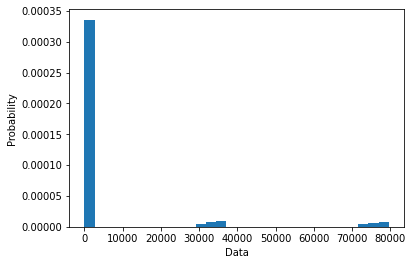

In [608]:
# Let's plot a histogram of returned_within_days to see its distribution
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

np.random.seed(42)
x = df_final1[df_final1.returned_within_days>=0].returned_within_days

plt.hist(x, density=True, bins=30)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data');

There are clearly some outliers that we need to drop to proceed in our analysis.

In [610]:
# Filtering out return_within_days values that are neative and those more than 20 years based on recorded dates
df_final1_cleaned = df_final1[(df_final1.returned_within_days >= 0)&(df_final1.returned_within_days < 20*356)]
df_final1_cleaned.sort_values(by='returned_within_days', ascending=False).head(2)

,book_id,library_id,date_checkout,date_returned,lib_name,lib_addr,lib_city,lib_region,lib_postal_code,title,authors,publisher,publishedDate,categories,price,pages,cus_id,name,street_address,city,state,zipcode,birth_date,gender,education,occupation,returned_within_days
1233,iGoXAQAAMAAJ,zzw-223@5xc-jv7-ct9,2018-01-03,2020-01-01,Friends OF the multnomah COUNTY Library,522 SW 5th Ave,NaN,OR,97204,Analytic Cyclopedia of Practical Medicine,['Charles Eucharist de Medicis Sajous'],NaN,1922,NaN,219.5,527,8adbb5ee424bef61d3e7aba4552f394b,Edward Singh,6800 SE Harmony Rd,Portland,Oregon,97222.0,1953-01-21,male,Graduate Degree,Admin & Support,728
1988,vYOofF63aBoC,zzw-223@5xc-jv7-ct9,2018-01-09,2020-01-01,Friends OF the multnomah COUNTY Library,522 SW 5th Ave,NaN,OR,97204,Advertising to Children in China,"['Kara K. W. Chan', 'Kara Chan', 'James U. McN...",Chinese University Press,2004,['Political Science'],USD404.99,559,16e18bc0e3d881671c1312ba8c690934,Kenneth Chavez,3735 SE 28th Ave,Portland,Oregon,97202.0,1978-08-26,male,College,Tech,722


Now let's plot return_within_days

<AxesSubplot:xlabel='date_checkout'>

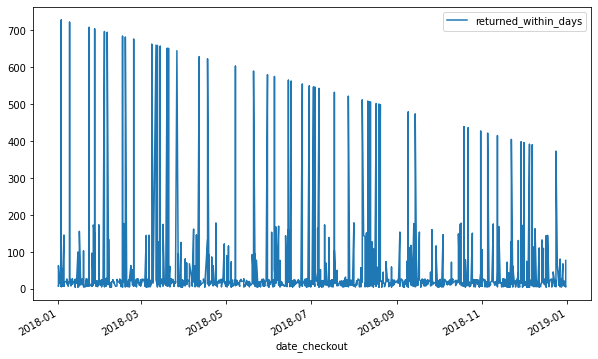

In [611]:
# Let's plot it
df_final1_cleaned.plot(x='date_checkout', y='returned_within_days', figsize=(10,6))

This plot gives us a more realistic snapshot of the status of book returns. It not only shows that most of the returns were within the 28 day limit but also shows that the most delayed returns were within 180 days of checkout (this also includes books that have not yet been returned).

After removing records with missing or incorrect checkout and/or return dates and outliers, we have clean data with 1451 records where we can reasonably rely on checkout and return dates being recorded correctly and now, we can analyze actual late returns.

I was also interested to see if the time of the year had an effect on customers returning books late but the data seems to be stationary in the above plot (the downward slope illustrates books that have not been returned for which I replaced nan value with 2020-01-01 to make further analysis easier).

In [612]:
print('Number of books that have not been returned: ',len(df_final1[df_final1.date_returned == '2020-01-01']))

Number of books that have not been returned:  58


In [615]:
# Number of records with late returns
print('All records: ',len(df_final1_cleaned))
print('Late returns: ', len(df_final1_cleaned[df_final1_cleaned.returned_within_days>28]))

All records:  1509
Late returns:  190


Let's see what is the ratio of late returns based on the new data

In [616]:
190/1509

0.12591119946984758

Aparently less than 13% of the books have not been returned within 28 days. As this is a classification problem for our machine learning model, we will have a highly imbalanced data. That is 13% belongs to late class and 87% belongs to not-late (returned on-time) class. We need to deal with this imbalance before we model our data so that we achieve a realistic accuracy in predicting late returns.

Now, let's create our target variable which defines if a book was returned late indicated with value 1 and else with 0.

In [ ]:
late = [1 if x>28 else 0 for x in df_final1_cleaned.returned_within_days]
df_final1_cleaned['late'] = late

In [620]:
df_final1_cleaned.head(2)

,book_id,library_id,date_checkout,date_returned,lib_name,lib_addr,lib_city,lib_region,lib_postal_code,title,authors,publisher,publishedDate,categories,price,pages,cus_id,name,street_address,city,state,zipcode,birth_date,gender,education,occupation,returned_within_days,late
2,-xFj0vTLbRIC,zzw-222@5xc-knn-c5z,2018-04-21,2018-05-09,Multnomah County Library Holgate,7905 SE Holgate Blvd,Portland,OR,NaN,Blood Engines,['T.A. Pratt'],Spectra,2007-09-25,['Fiction'],144.5,513,24032e18ff12062ba68766387df2ee99,Linda Wilkes,3504 SE 92nd Ave,Portland,NaN,-97266.0,2005-06-29,female,Graduate Degree,Admin & Support,18,0
4,-xFj0vTLbRIC,zzw-223@5xc-jv7-ct9,2018-01-15,2018-01-24,Friends OF the multnomah COUNTY Library,522 SW 5th Ave,NaN,OR,97204,Blood Engines,['T.A. Pratt'],Spectra,2007-09-25,['Fiction'],144.5,513,529979f69bcda5cec760005da7978c11,Shirley Pollock,54 NE 12th Ave,NaN,Oregon,97232.0,2007-11-17,female,Others,Business & Finance,9,0


Now that we have our clean and complete dateset, let's preprocess our data so that it could be fed in a machine learning model. That is droping redundant data, making sure string values that represent the same thing are in consistent format, numeric values are in the proper data type etc.

In [623]:
df_final1_cleaned.lib_region.value_counts() # All the same region, we can drop this column

OR     767
or     308
OR     178
 OR     95
Name: lib_region, dtype: int64

Some of the columns are simply redundant data for instance, as long as we have the library id, the library name is of no value in our analysis. Let's get rid of the columns with no value here.

In [624]:
df_final1_cleaned1 = df_final1_cleaned.drop(['lib_name','lib_addr', 'lib_region', 'title', 'publishedDate',
                                             'name','street_address', 'returned_within_days','date_checkout',
                                            'date_returned','publisher'], axis=1)
df_final1_cleaned1.head()

,book_id,library_id,lib_city,lib_postal_code,authors,categories,price,pages,cus_id,city,state,zipcode,birth_date,gender,education,occupation,late
2,-xFj0vTLbRIC,zzw-222@5xc-knn-c5z,Portland,NaN,['T.A. Pratt'],['Fiction'],144.5,513,24032e18ff12062ba68766387df2ee99,Portland,NaN,-97266.0,2005-06-29,female,Graduate Degree,Admin & Support,0
4,-xFj0vTLbRIC,zzw-223@5xc-jv7-ct9,NaN,97204,['T.A. Pratt'],['Fiction'],144.5,513,529979f69bcda5cec760005da7978c11,NaN,Oregon,97232.0,2007-11-17,female,Others,Business & Finance,0
5,-xFj0vTLbRIC,226-222@5xc-jxj-7yv,Portland,97214,['T.A. Pratt'],['Fiction'],144.5,513,b0ff7b25ecc4949aed61c0d0f914dfbd,Portland,Oregon,97220.0,2106-12-26,male,College,Blue Collar,0
7,-xFj0vTLbRIC,222-222@5xc-jvf-skf,portland,97203,['T.A. Pratt'],['Fiction'],144.5,513,71325ff160af04c414dd03b58774f23a,Portland,Oregon,97203.0,2004-09-24,male,Graduate Degree,Sales,0
10,7T9-BAAAQBAJ,222-222@5xc-jv5-nt9,Portland,#97217,"['Eugene F. Brigham', 'Joel F. Houston']",['Business & Economics'],406.99,774,f8584c280388ca0798e1b635f7afc1b8,Portland,Oregon,97203.0,1974-04-04,NaN,High School,Sales,0


In [626]:
df_final1_cleaned1.city.value_counts() 

Portland         1202
PORTLAND           42
 Portland          35
Portland           31
Vancouver          24
Lake Oswego        20
Happy Valley       19
Beaverton          17
portland           11
West Linn           5
Tualatin            5
Oregon City         5
 Vancouver          3
Gresham             2
Clackamas           2
Vancouver           1
 Beaverton          1
HAPPY Valley        1
Lake   Oswego       1
Gladstone           1
Happy Valley        1
Happy  Valley       1
BEAVERTON           1
vancouver           1
Damascus            1
VANCOUVER           1
LAKE OSWEGO         1
Lake OSWEGO         1
Name: city, dtype: int64

As we see here, the data entry has been very inconsistent. For instance, in the city column, Portland has been entered in four different ways. Before any analysis we need to make sure we have data in consistent formats across all columns.

In [627]:
# Function to get string names in consistent format
def consistentString(s):
    return str(s).strip().lower()

In [628]:
# Putting cities and states with the same name in a consistent format
df_final1_cleaned1.city = list(map(lambda x: consistentString(x), df_final1_cleaned1.city))
df_final1_cleaned1.state = list(map(lambda x: consistentString(x), df_final1_cleaned1.state))
df_final1_cleaned1.lib_city = list(map(lambda x: consistentString(x), df_final1_cleaned1.lib_city))

In [629]:
# Function to get date objects in datetime format
from datetime import datetime
def get_date(s):
    try:
        date_re = re.compile('[0-9]+')
        s = str(s).strip()
        s =  "".join(date_re.findall(s))
        return datetime.strptime(s, '%Y%m%d')
    except:
        pass

# Function to get epoch time to be used in regression model
def to_epoch(series_of_times):
    def _(x):
        try:
            return float(x.timestamp())
        except:
            return 0
    return series_of_times.apply(lambda x: _(x)).values.reshape(-1,1)

In [630]:
# Convertin birthdate columns to datetimeobject and then to epoch time for further analysis
df_final1_cleaned1.birth_date = list(map(lambda x: get_date(x), df_final1_cleaned1.birth_date))

In [631]:
df_final1_cleaned1.birth_date = to_epoch(df_final1_cleaned1.birth_date)

In [633]:
df_final1_cleaned1.birth_date[:5]

2     1.120003e+09
4     1.195258e+09
5     4.322765e+09
7     1.095984e+09
10    1.342656e+08
Name: birth_date, dtype: float64

In [634]:
def get_price(s):
    try:
        return re.findall("[-+]?\d*\.\d+|\d+",str(s))[0]
    except:
        return 0

In [ ]:
# Converting numeric values to numeric data types to be fed in the ML model
df_final1_cleaned1.pages = list(map(lambda x: int(re.compile('[0-9]+').findall(str(x))[0]),
                                    df_final1_cleaned1.pages))

df_final1_cleaned1.price = list(map(lambda x: float(get_price(x)), 
         df_final1_cleaned1.price))

Authors and categories features contain lists of strings which need be engineered into new features representing all authors and all categories. For the sake of simplicity, let's drop these columns for now and proceed to modeling our data and see how good of a model we get.

In [640]:
df_final1_cleaned1.drop(['authors', 'categories'], axis=1, inplace=True)

We have got some missing values in our data. Since they are all in categorical columns, I will treat missing values (nan) as a separate category by converting them to string data type.

In [638]:
categorical_columns = ['book_id','library_id','lib_city','lib_postal_code',
                       'cus_id','city','state','zipcode','gender','education','occupation']
for x in categorical_columns:
    df_final1_cleaned1[x] = list(map(lambda y:str(y), df_final1_cleaned1[x]))

In [699]:
df_final1_cleaned1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1509 entries, 2 to 1999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   book_id          1509 non-null   object 
 1   library_id       1509 non-null   object 
 2   lib_city         1509 non-null   object 
 3   lib_postal_code  1509 non-null   object 
 4   price            1509 non-null   float64
 5   pages            1509 non-null   int64  
 6   cus_id           1509 non-null   object 
 7   city             1509 non-null   object 
 8   state            1509 non-null   object 
 9   zipcode          1509 non-null   object 
 10  birth_date       1509 non-null   float64
 11  gender           1509 non-null   object 
 12  education        1509 non-null   object 
 13  occupation       1509 non-null   object 
 14  late             1509 non-null   int64  
dtypes: float64(2), int64(2), object(11)
memory usage: 188.6+ KB


And no more missing values!

## Feature Selection

Let's see what the correlation between numerical values look like.

In [644]:
corr = df_final1_cleaned1.corr()
corr.style.background_gradient(cmap='coolwarm')

,price,pages,birth_date,late
price,1.000000,0.737329,0.014043,0.138922
pages,0.737329,1.000000,0.034661,0.190609
birth_date,0.014043,0.034661,1.000000,-0.017420
late,0.138922,0.190609,-0.017420,1.000000


Our target variable (late) is mostly correlated with price and after that with pages of the book which means the higher the price and the number of pages of a book the higher the probability for that book being returned late (or not returned at all). It is also slightly negatively correlated with ages of customers which means the younger the customer the higher probability of them having late returns. 

We also need analyze relationship between target variable and categorical variables to have better jsudgment of what factors contribute to late returns the most.For that, [machinelearningmastery.com](https://machinelearningmastery.com/feature-selection-with-categorical-data/) has a introduced a good method: Chi-squared statistic. We can draw  barchart that illustrates feature importance for all features including categorical. Below code was borrowed from machinelearningmastery.com and appropriated to our scienario.

Feature 0: 178.613283
Feature 1: 2.207893
Feature 2: 0.286144
Feature 3: 0.459709
Feature 4: 598.491112
Feature 5: 1396.571856
Feature 6: 486.861083
Feature 7: 0.588135
Feature 8: 0.447475
Feature 9: 28.252844
Feature 10: 42.992641
Feature 11: 0.620018
Feature 12: 0.271073
Feature 13: 1.500277


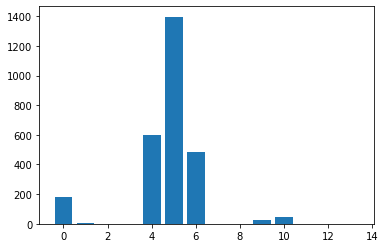

In [647]:
# example of chi squared feature selection for categorical data
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot

# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder(handle_unknown='ignore')
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# split into train and test sets
y = df_final1_cleaned1['late']
X = df_final1_cleaned1.drop('late', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [650]:
X_train.columns

Index(['book_id', 'library_id', 'lib_city', 'lib_postal_code', 'price',
       'pages', 'cus_id', 'city', 'state', 'zipcode', 'birth_date', 'gender',
       'education', 'occupation'],
      dtype='object')

Above analysis and plot show that the most relevant features to our target variable are price, pages, and cus_id. That means factors that have a strong connection to late returns are price and pages of the book as well as the individual customer. Variables book_id, customer birth_date and zipcode also have some influence on the late returns.

Before jumping to modeling though, we need to take care of class imbalance. I will use sklearn's [SMOTEN](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTENC.html#imblearn.over_sampling.SMOTENC) for upsampling which handles both categorical and numeric columns.

In [701]:
y =  df_final1_cleaned1['late']
X = df_final1_cleaned1.drop('late', axis=1)

In [702]:
X.head()

,book_id,library_id,lib_city,lib_postal_code,price,pages,cus_id,city,state,zipcode,birth_date,gender,education,occupation
2,-xFj0vTLbRIC,zzw-222@5xc-knn-c5z,portland,nan,144.50,513,24032e18ff12062ba68766387df2ee99,portland,nan,-97266.0,1.120003e+09,female,Graduate Degree,Admin & Support
4,-xFj0vTLbRIC,zzw-223@5xc-jv7-ct9,nan,97204,144.50,513,529979f69bcda5cec760005da7978c11,nan,oregon,97232.0,1.195258e+09,female,Others,Business & Finance
5,-xFj0vTLbRIC,226-222@5xc-jxj-7yv,portland,97214,144.50,513,b0ff7b25ecc4949aed61c0d0f914dfbd,portland,oregon,97220.0,4.322765e+09,male,College,Blue Collar
7,-xFj0vTLbRIC,222-222@5xc-jvf-skf,portland,97203,144.50,513,71325ff160af04c414dd03b58774f23a,portland,oregon,97203.0,1.095984e+09,male,Graduate Degree,Sales
10,7T9-BAAAQBAJ,222-222@5xc-jv5-nt9,portland,#97217,406.99,774,f8584c280388ca0798e1b635f7afc1b8,portland,oregon,97203.0,1.342656e+08,nan,High School,Sales


## Upsampling the minority class

In [703]:
from imblearn.over_sampling import SMOTENC
from collections import Counter
smote_nc = SMOTENC(categorical_features=[0,1,2,3,6,7,8,9,11,12,13], random_state=0)
X_resampled, y_resampled = smote_nc.fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))
print(X_resampled[-5:])

[(0, 1319), (1, 1319)]
           book_id           library_id  lib_city lib_postal_code       price  \
2633  _L9IAAAAYAAJ  222-222@5xc-jv5-nt9  portland          #97217  404.161159   
2634  DlN0CAAAQBAJ  zzw-222@5xc-jv4-789  portland          97212   220.019103   
2635  bz87AQAAMAAJ  222-222@5xc-jvf-skf  portland             nan  394.023068   
2636  SovM2UsP7nAC  22c-222@5xc-jwj-pvz  portland             nan  357.353422   
2637  kTfWdFgNUT0C  zzw-223@5xc-jv7-ct9       nan          97212-  327.493217   

      pages                            cus_id          city   state  zipcode  \
2633    611  930bbca06d4a32dd5584a06b81eb3592     vancouver  oregon  97008.0   
2634    388  4b89ea6302c5bdfd374f0055f255ba48  happy valley  oregon  97086.0   
2635    714  adec8842e8d5a04bc4b5dab4fe957a95      portland  oregon  97233.0   
2636    723  0a7ffa18ed9f3eabe92329de44ee97cb      portland  oregon  97034.0   
2637    766  60a31afe364a72ec766348ff7f1a8271      portland  oregon  97218.0   

        b

In [704]:
X_resampled.head()

,book_id,library_id,lib_city,lib_postal_code,price,pages,cus_id,city,state,zipcode,birth_date,gender,education,occupation
0,-xFj0vTLbRIC,zzw-222@5xc-knn-c5z,portland,nan,144.50,513,24032e18ff12062ba68766387df2ee99,portland,nan,-97266.0,1.120003e+09,female,Graduate Degree,Admin & Support
1,-xFj0vTLbRIC,zzw-223@5xc-jv7-ct9,nan,97204,144.50,513,529979f69bcda5cec760005da7978c11,nan,oregon,97232.0,1.195258e+09,female,Others,Business & Finance
2,-xFj0vTLbRIC,226-222@5xc-jxj-7yv,portland,97214,144.50,513,b0ff7b25ecc4949aed61c0d0f914dfbd,portland,oregon,97220.0,4.322765e+09,male,College,Blue Collar
3,-xFj0vTLbRIC,222-222@5xc-jvf-skf,portland,97203,144.50,513,71325ff160af04c414dd03b58774f23a,portland,oregon,97203.0,1.095984e+09,male,Graduate Degree,Sales
4,7T9-BAAAQBAJ,222-222@5xc-jv5-nt9,portland,#97217,406.99,774,f8584c280388ca0798e1b635f7afc1b8,portland,oregon,97203.0,1.342656e+08,nan,High School,Sales


In [705]:
X_resampled['late'] = y_resampled
print(X_resampled[X_resampled.late == 1].info())
print(X_resampled[X_resampled.late == 0].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1319 entries, 6 to 2637
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   book_id          1319 non-null   object 
 1   library_id       1319 non-null   object 
 2   lib_city         1319 non-null   object 
 3   lib_postal_code  1319 non-null   object 
 4   price            1319 non-null   float64
 5   pages            1319 non-null   int64  
 6   cus_id           1319 non-null   object 
 7   city             1319 non-null   object 
 8   state            1319 non-null   object 
 9   zipcode          1319 non-null   object 
 10  birth_date       1319 non-null   float64
 11  gender           1319 non-null   object 
 12  education        1319 non-null   object 
 13  occupation       1319 non-null   object 
 14  late             1319 non-null   int64  
dtypes: float64(2), int64(2), object(11)
memory usage: 164.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int

Now we have same number of records for either class.

# Modeling

Let's experiment modeling with various classification algorithms and evaluate and compare their performances.

In [706]:
# Shuffling the data
from sklearn.utils import shuffle
X_resampled = shuffle(X_resampled)

In [708]:
# Defining training data and lables
y_resampled = X_resampled['late']
X_resampled.drop('late', axis=1, inplace=True)

In [716]:
# Spliting the data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.30)

In [736]:
# Creating the ML pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

categorical_columns = ['book_id','library_id','lib_city','lib_postal_code',
                       'cus_id','city','state','zipcode','gender','education','occupation']
numeric_columns = ['price','pages','birth_date']

gs = GridSearchCV(
    RandomForestClassifier(),
    {"min_samples_split":[5, 7 ,10, 13]},
    cv=10)

features = ColumnTransformer([
    ('categorical', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
    ('numeric', 'passthrough', numeric_columns),
])

estimator = Pipeline([
    ('features', features),
    ('scaling', MaxAbsScaler()),
    ('estimator', gs)
])

In [744]:
# Function to fit and evaluate different models and return their accuracies
def compare_estimators(estimators):
    i = 0
    for est in estimators:
        estimator = Pipeline([
            ('features', features),
            ('scaling', MaxAbsScaler()),
            ('estimator', est)
        ])
        
        estimator.fit(X_train, y_train)
        print(f"Train Accuracy {est}:", estimator.score(X_train, y_train),"\n",
                f"Test Accuracy {est}:", estimator.score(X_test, y_test), "\n")
        i +=1

In [745]:
# Comparing models (fed with all features)
compare_estimators([gs, LogisticRegressionCV(max_iter=10000), RidgeClassifierCV(), SGDClassifier(),
                   LinearSVC(), KNeighborsClassifier(), GradientBoostingClassifier()])

Train Accuracy GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': [5, 7, 10, 13]}): 0.9978331527627302 
 Test Accuracy GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': [5, 7, 10, 13]}): 0.8446969696969697 

Train Accuracy LogisticRegressionCV(max_iter=10000): 1.0 
 Test Accuracy LogisticRegressionCV(max_iter=10000): 0.98989898989899 

Train Accuracy RidgeClassifierCV(alphas=array([ 0.1,  1. , 10. ])): 1.0 
 Test Accuracy RidgeClassifierCV(alphas=array([ 0.1,  1. , 10. ])): 0.9936868686868687 

Train Accuracy SGDClassifier(): 1.0 
 Test Accuracy SGDClassifier(): 0.9393939393939394 

Train Accuracy LinearSVC(): 1.0 
 Test Accuracy LinearSVC(): 0.9886363636363636 

Train Accuracy KNeighborsClassifier(): 0.918201516793066 
 Test Accuracy KNeighborsClassifier(): 0.8611111111111112 

Train Accuracy GradientBoostingClassifier(): 0.7990249187432286 
 Test Accuracy GradientBoostingClassifier(

Let's see how our models perform when we only use the five features that have most relevance to our target variable.

In [752]:
# ML pipeline for select features only
categorical_columns = ['book_id','cus_id']
numeric_columns = ['price','pages','birth_date']

gs = GridSearchCV(
    RandomForestClassifier(),
    {"min_samples_split":[5, 7 ,10, 13]},
    cv=10)

features = ColumnTransformer([
     ('categorical', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
     ('numeric', 'passthrough', numeric_columns),
 ])

In [753]:
compare_estimators([RandomForestClassifier(), LogisticRegressionCV(max_iter=10000), RidgeClassifierCV(), SGDClassifier(),
                   LinearSVC(), KNeighborsClassifier(), GradientBoostingClassifier()])

Train Accuracy RandomForestClassifier(): 1.0 
 Test Accuracy RandomForestClassifier(): 0.8661616161616161 

Train Accuracy LogisticRegressionCV(max_iter=10000): 1.0 
 Test Accuracy LogisticRegressionCV(max_iter=10000): 0.98989898989899 

Train Accuracy RidgeClassifierCV(alphas=array([ 0.1,  1. , 10. ])): 1.0 
 Test Accuracy RidgeClassifierCV(alphas=array([ 0.1,  1. , 10. ])): 0.9936868686868687 

Train Accuracy SGDClassifier(): 1.0 
 Test Accuracy SGDClassifier(): 0.9861111111111112 

Train Accuracy LinearSVC(): 1.0 
 Test Accuracy LinearSVC(): 0.9886363636363636 

Train Accuracy KNeighborsClassifier(): 0.918201516793066 
 Test Accuracy KNeighborsClassifier(): 0.8611111111111112 

Train Accuracy GradientBoostingClassifier(): 0.8039003250270856 
 Test Accuracy GradientBoostingClassifier(): 0.7297979797979798 



As expected, the model performance did not change noticeably. Even in the case of SGDClassifier, the test data accuracy improved a little bit. This reaffirms that the variables that play a role in predicting target variable are price, pages, bood_id, cus_id, and customer birth_date. 

The best performing model is RidgClassifierCV with about 99.4% accuracy on test data and worst performing model is GradientBoostingClassifier with 72% accuracy and that is likely because this model is better suited to large datasets. In conclusion, we will use LogisticRegressionCV with accuracy of about 99% to make prediction as it also easily generates probabilities for us.

# Question 1: build a model to predict the likelihood of a late return of any book at checkout time? 

In [775]:
# Final model
estimator = Pipeline([
    ('features', features),
    ('scaling', MaxAbsScaler()),
    ('estimator', LogisticRegressionCV())
])

estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
probs = estimator.predict_proba(X_test)

In [767]:
y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,

In [776]:
# List of probability of being returned late for each book in test data
probs = [round(x[1],2) for x in probs]

# Question 2: Are there any factors you can find that are connected with late returns?

As shown in the Feature Selectio section, the analysis and plot show that the most relevant features to our target variable are price, pages, and cus_id. That means factors that have a strong connection to late returns are price and pages of the book as well as the individual customer. Variables book_id, customer birth_date and zipcode also have some influence on the late returns.

# Question 3: What would you recommend the library do to mitigate the risks you find? 

As mentioned in question 2, three most important factors that are connected to late return in order of importance are number of pages of the book, price of the book and the individual customer. As for the first one, the reason for late returns could simply be customers need more time to read the book as it has more pages. Therefore, for such books, one solution could be the library extends the return time so that the customer can manage to finish the book without worrying about being penalized for a late return (if there exist any).  Another solution that might help for all three factors is a small incentive for ontime returns. Somthing such as a discount coupon on an online purchase or something similar for customers who return ontime might go a long way.

Another suggestion to the library would be to invest in a new/better platform for administrative tasks such as data entry to their computer system. Had we had more accurate data including checkout and return dates, we could have a better analysis of the problem.

# Question 4: How would you present your findings to them to get buy-in? 

With a simple analysis of the accumulative cost of late returns to the library, including book that were never returned, and benefit of investing in a new policy (incentivising ontime returns), the librarians will be able to see the value of the proposition in the long run.